Dalam analisis ini, data yang digunakan merupakan data pengangguran dari website **World Bank**

In [1]:
# Import modul yang akan digunakan terlebih dahulu
import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_line, geom_point, facet_wrap, theme
!pip install dplython
from dplython import arrange, mutate, group_by, summarize, DelayFunction

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 715 kB 5.1 MB/s 
  Created wheel for dplython: filename=dplython-0.0.7-py3-none-any.whl size=747243 sha256=6453a8160b8aeb564da2db3bb26b3a7e24cc3a7e6adc0f969d5154f5576b8d76
  Stored in directory: /root/.cache/pip/wheels/3f/aa/f2/d301d57e16e884f9f86c2bbd417920a381405d0a576b40856f
Successfully built dplython


In [2]:
# Import data yang akan digunakan
Data = pd.read_csv('https://raw.githubusercontent.com/Iqbalpr/Tugas-Kuliah--UIN/main/Pengangguran%20-%20Sheet1%20(1).csv')
Data.head(5)

,Negara,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Status
0,Indonesia,5.61,5.15,4.47,4.34,4.05,4.51,4.30,3.88,4.40,3.62,4.280,4.413,Berkembang
1,China,4.53,4.55,4.57,4.59,4.61,4.63,4.53,4.44,4.28,4.52,5.000,4.817,Berkembang
2,Japan,5.10,4.55,4.36,4.00,3.60,3.40,3.10,2.80,2.40,2.40,2.800,2.799,Maju
3,Malaysia,3.39,3.05,3.10,3.16,2.88,3.10,3.44,3.41,3.30,3.26,4.504,4.609,Berkembang
4,Hong Kong SAR. China,4.33,3.42,3.29,3.40,3.30,3.31,3.39,3.13,2.82,2.93,5.830,5.315,Maju


In [3]:
# Karena data blm terbentuk rapih, maka dilakukannya perapihan data dengan command "melt"
Data_DL = pd.melt(Data, id_vars =['Negara', 'Status'])

In [4]:
Data_DL

,Negara,Status,variable,value
0,Indonesia,Berkembang,2010,5.610
1,China,Berkembang,2010,4.530
2,Japan,Maju,2010,5.100
3,Malaysia,Berkembang,2010,3.390
4,Hong Kong SAR. China,Maju,2010,4.330
...,...,...,...,...
355,Russian Federation,Berkembang,2021,5.010
356,Poland,Berkembang,2021,3.368
357,Hungary,Berkembang,2021,4.116
358,United Kingdom,Maju,2021,4.526


In [5]:
# Selanjutnya mengganti nama kolom "variabel" dan "value" menjadi "Tahun" dan "Pengangguran"
Data_DL.rename(columns={'variable':'Tahun', 'value':'Pengangguran'}, inplace=True)

In [6]:
Data_DL.columns

Index(['Negara', 'Status', 'Tahun', 'Pengangguran'], dtype='object')

In [7]:
# Selanjutnya melihat ringkasan data
Data_DL.info()
print("\n")
Data_DL.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Negara        360 non-null    object 
 1   Status        360 non-null    object 
 2   Tahun         360 non-null    object 
 3   Pengangguran  360 non-null    float64
dtypes: float64(1), object(3)
memory usage: 11.4+ KB




,Pengangguran
count,360.000000
mean,7.199225
std,5.137771
min,1.745000
25%,4.123000
50%,5.307500
75%,8.990000
max,33.559000


In [8]:
# Kita ubah tipe data pada kolom "Tahun" dan "Status" menjadi bertipe category
columns = ['Tahun', 'Status']
Data_DL[columns] = Data_DL[columns].astype('category')
Data_DL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Negara        360 non-null    object  
 1   Status        360 non-null    category
 2   Tahun         360 non-null    category
 3   Pengangguran  360 non-null    float64 
dtypes: category(2), float64(1), object(1)
memory usage: 7.0+ KB


/usr/local/lib/python3.7/dist-packages/plotnine/guides/guide_legend.py:308: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


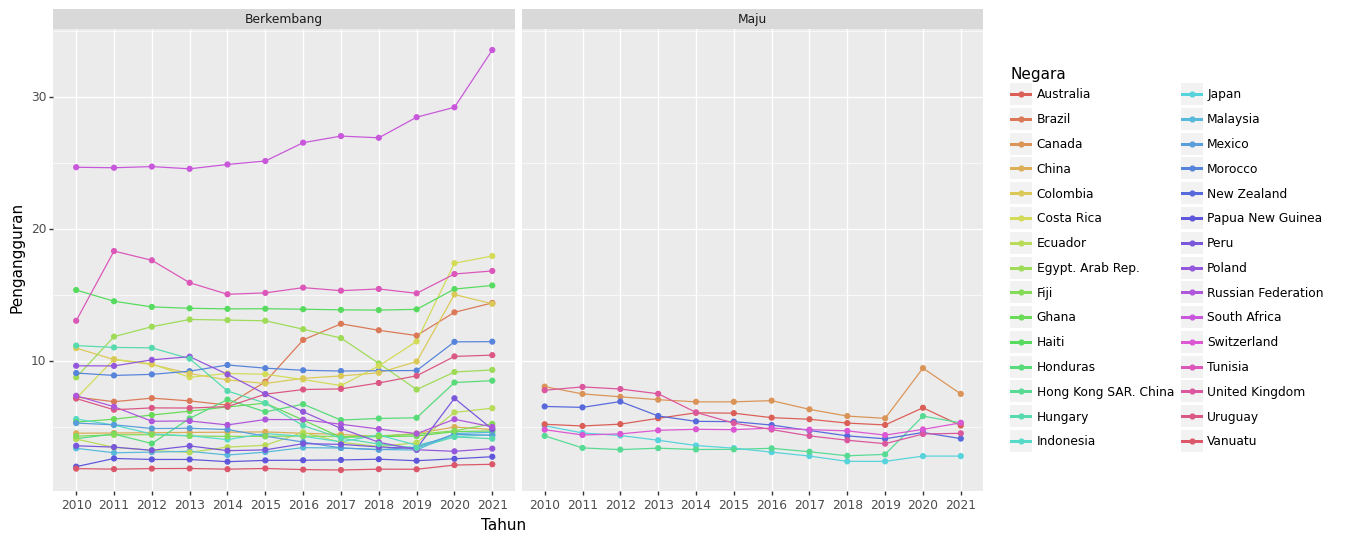

<ggplot: (8761314996521)>

In [9]:
# Selanjutnya dilakukannya, membuat plot profil individu
ggplot(Data_DL) + aes(x="Tahun", y="Pengangguran", color = "Negara", group = "Negara") + geom_line() + geom_point() + facet_wrap('~Status') + theme(figure_size=(12, 6))

In [11]:
# Selanjutnya kita buat evolusi plotnya secara keseluruhan dengan menggunakan mean
Data_EV = Data_DL
Data_EV['Mean'] = Data_DL.groupby(['Status', 'Tahun'])["Pengangguran"].transform('mean')

In [12]:
Data_EV

,Negara,Status,Tahun,Pengangguran,Mean
0,Indonesia,Berkembang,2010,5.610,7.647087
1,China,Berkembang,2010,4.530,7.647087
2,Japan,Maju,2010,5.100,5.978571
3,Malaysia,Berkembang,2010,3.390,7.647087
4,Hong Kong SAR. China,Maju,2010,4.330,5.978571
...,...,...,...,...,...
355,Russian Federation,Berkembang,2021,5.010,9.104565
356,Poland,Berkembang,2021,3.368,9.104565
357,Hungary,Berkembang,2021,4.116,9.104565
358,United Kingdom,Maju,2021,4.526,4.958143


/usr/local/lib/python3.7/dist-packages/plotnine/guides/guide_legend.py:308: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


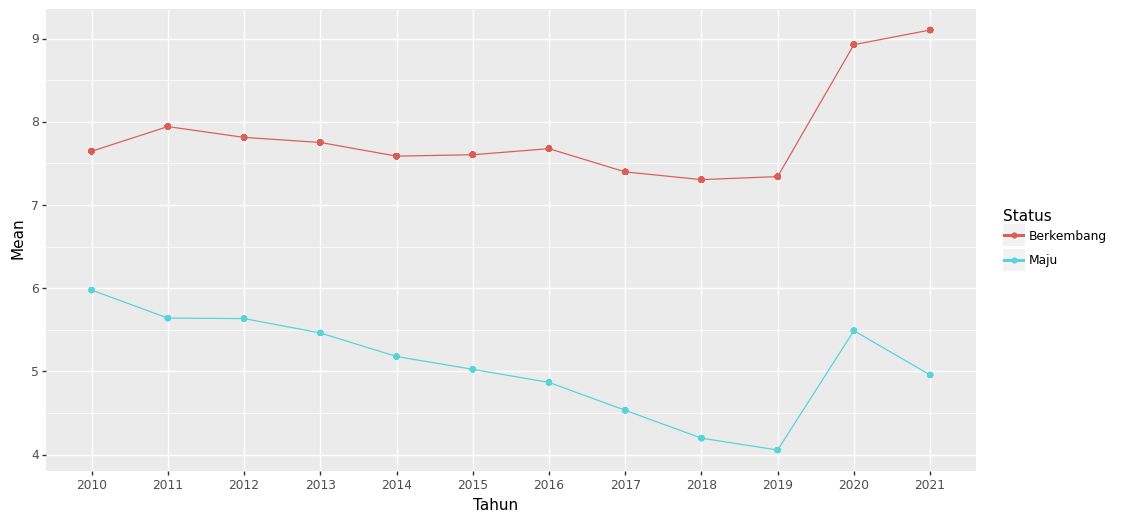

<ggplot: (8761310277277)>

In [13]:
ggplot(Data_EV) + aes(x="Tahun", y="Mean", color = "Status", group = "Status") + geom_line() + geom_point() +  theme(figure_size=(12, 6))

In [14]:
# Selanjutnya kita liat evolusinya secara keseluruhan dengan menggunakan var
Data_EV2 = Data_DL
Data_EV2['Var'] = Data_DL.groupby(['Status', 'Tahun'])["Pengangguran"].transform('var')

/usr/local/lib/python3.7/dist-packages/plotnine/guides/guide_legend.py:308: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


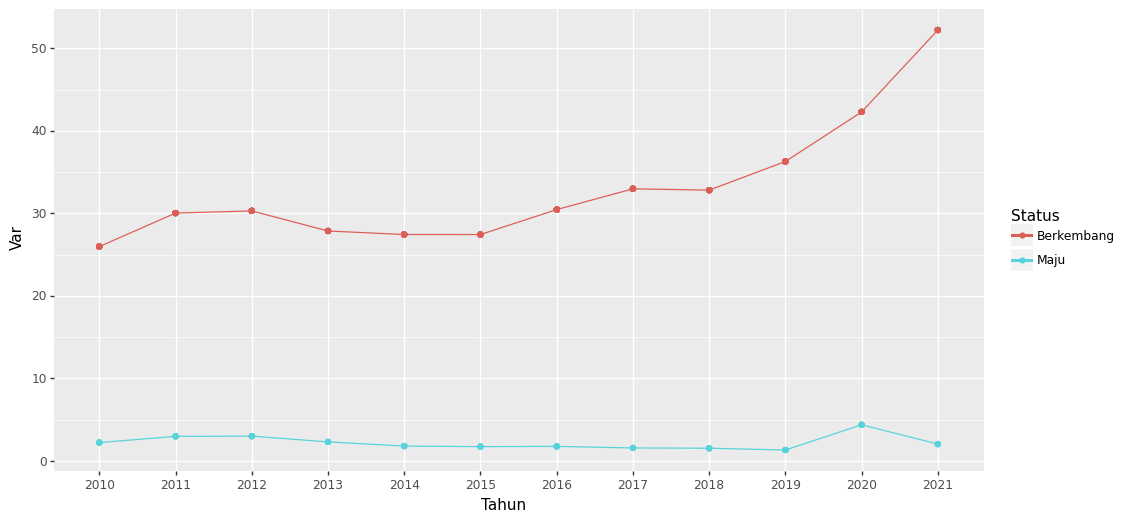

<ggplot: (8761310273509)>

In [15]:
ggplot(Data_EV2) + aes(x="Tahun", y="Var", color = "Status", group = "Status") + geom_line() + geom_point() +  theme(figure_size=(12, 6))

In [17]:
# Selanjutnya membuat matriks korelasi
Data.corr().style.background_gradient().set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`


,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2010,1.00,0.96,0.96,0.96,0.94,0.93,0.91,0.89,0.88,0.87,0.81,0.83
2011,0.96,1.00,1.00,0.99,0.97,0.96,0.92,0.90,0.89,0.88,0.83,0.84
2012,0.96,1.00,1.00,0.99,0.97,0.96,0.93,0.91,0.89,0.87,0.82,0.83
2013,0.96,0.99,0.99,1.00,0.99,0.98,0.94,0.92,0.90,0.88,0.82,0.84
2014,0.94,0.97,0.97,0.99,1.00,0.99,0.96,0.94,0.93,0.91,0.86,0.87
2015,0.93,0.96,0.96,0.98,0.99,1.00,0.99,0.97,0.96,0.94,0.89,0.90
2016,0.91,0.92,0.93,0.94,0.96,0.99,1.00,1.00,0.99,0.97,0.92,0.94
2017,0.89,0.90,0.91,0.92,0.94,0.97,1.00,1.00,0.99,0.98,0.93,0.94
2018,0.88,0.89,0.89,0.90,0.93,0.96,0.99,0.99,1.00,0.99,0.95,0.97
2019,0.87,0.88,0.87,0.88,0.91,0.94,0.97,0.98,0.99,1.00,0.97,0.98
